<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Multi-quantile loss with CatBoost



# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
sns.set()

In [2]:
import catboost
catboost.__version__

'1.1.1'

# Classification vs. regression
<hr style="border:2px solid black"> </hr>


- While many classification models, particularly calibrated models, come with uncertainty quantification by predicting a probability distribution over target classes, quantifying uncertainty in regression tasks is much more nuanced.



# Multi-quantile loss function 
<hr style="border:2px solid black"> </hr>


- **Classical quantile regression**: the main disadvantage of quantile regression was that one model had to be trained per predicted quantile. For instance, in order to predict the 10th, 50th, and 90th quantiles of a target distribution, three independent models would need to be trained. 
- Catboost has since addressed this issue with the **multi-quantile loss function** — a loss function that enables a single model to predict an arbitrary number of quantiles. Catboost now extends this idea by allowing the base decision trees to output multiple quantiles per node. This allows a single model to predict multiple quantiles by minimizing a new single loss function.
    


# Simple Linear Regression
<hr style="border:2px solid black"> </hr>

In [3]:

# Number of training and testing examples
n = 1000

# Generate random x values between 0 and 1
x_train = np.random.rand(n)
x_test = np.random.rand(n)

# Generate random noise for the target
noise_train = np.random.normal(0, 0.3, n)
noise_test = np.random.normal(0, 0.3, n)

# Set the slope and y-intercept of the line
a, b = 2, 3

# Generate y values according to the equation y = ax + b + noise
y_train = a * x_train + b + noise_train
y_test = a * x_test + b + noise_test

In [4]:
# Store quantiles 0.01 through 0.99 in a list
quantiles = [q/100 for q in range(1, 100)]

# Format the quantiles as a string for Catboost
quantile_str = str(quantiles).replace('[','').replace(']','')

# Fit the multi quantile model
model = CatBoostRegressor(iterations=100,
                          loss_function=f'MultiQuantile:alpha={quantile_str}')

model.fit(x_train.reshape(-1,1), y_train)

0:	learn: 0.1822244	total: 90.1ms	remaining: 8.92s
1:	learn: 0.1781949	total: 113ms	remaining: 5.53s
2:	learn: 0.1742768	total: 133ms	remaining: 4.29s
3:	learn: 0.1705530	total: 151ms	remaining: 3.63s
4:	learn: 0.1668017	total: 170ms	remaining: 3.22s
5:	learn: 0.1634159	total: 189ms	remaining: 2.97s
6:	learn: 0.1601224	total: 209ms	remaining: 2.78s
7:	learn: 0.1568451	total: 228ms	remaining: 2.63s
8:	learn: 0.1535948	total: 247ms	remaining: 2.49s
9:	learn: 0.1505827	total: 265ms	remaining: 2.38s
10:	learn: 0.1476290	total: 284ms	remaining: 2.29s
11:	learn: 0.1448954	total: 302ms	remaining: 2.22s
12:	learn: 0.1422563	total: 321ms	remaining: 2.15s
13:	learn: 0.1396460	total: 340ms	remaining: 2.09s
14:	learn: 0.1371478	total: 358ms	remaining: 2.03s
15:	learn: 0.1347768	total: 376ms	remaining: 1.97s
16:	learn: 0.1325191	total: 393ms	remaining: 1.92s
17:	learn: 0.1304375	total: 409ms	remaining: 1.86s
18:	learn: 0.1283525	total: 426ms	remaining: 1.82s
19:	learn: 0.1263576	total: 443ms	remain

In [5]:
# Make predictions on the test set
preds = model.predict(x_test.reshape(-1, 1))
preds = pd.DataFrame(preds, columns=[f'pred_{q}' for q in quantiles])

In [6]:
preds

,pred_0.01,pred_0.02,pred_0.03,pred_0.04,pred_0.05,pred_0.06,pred_0.07,pred_0.08,pred_0.09,pred_0.1,...,pred_0.9,pred_0.91,pred_0.92,pred_0.93,pred_0.94,pred_0.95,pred_0.96,pred_0.97,pred_0.98,pred_0.99
0,2.780810,2.919800,3.030097,3.077203,3.122938,3.142582,3.159697,3.174949,3.186437,3.208742,...,4.016406,4.038276,4.068289,4.104559,4.141282,4.159329,4.176311,4.218180,4.284007,4.323767
1,2.961797,3.081225,3.154090,3.184252,3.208173,3.226239,3.241753,3.249546,3.266106,3.291142,...,4.095972,4.120077,4.152393,4.194770,4.224691,4.241023,4.254298,4.289660,4.337686,4.401055
2,2.659465,2.749874,2.810904,2.852310,2.901965,2.938069,2.956318,2.966792,2.979737,2.990213,...,3.756001,3.768349,3.788441,3.808197,3.834223,3.858877,3.880076,3.898736,3.949464,4.008651
3,2.499942,2.599218,2.652371,2.686339,2.728708,2.763536,2.785316,2.806392,2.822385,2.837185,...,3.612766,3.626786,3.642999,3.676506,3.709685,3.742884,3.753743,3.768540,3.802039,3.867699
4,2.747039,2.879160,2.976875,3.029606,3.086291,3.103335,3.120486,3.128556,3.140183,3.157544,...,3.893958,3.912940,3.934129,3.967662,4.014142,4.040067,4.081890,4.135766,4.195081,4.241734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.409629,3.454340,3.498805,3.532311,3.576726,3.611444,3.635553,3.658541,3.694656,3.718136,...,4.675914,4.710945,4.735662,4.765018,4.786650,4.811913,4.844448,4.877483,4.930702,4.981463
996,2.757188,2.891967,2.999985,3.048702,3.095930,3.118739,3.134283,3.144274,3.168619,3.187823,...,3.977869,3.996933,4.027324,4.061830,4.098242,4.116658,4.133683,4.177272,4.246289,4.283282
997,2.515528,2.598464,2.648597,2.687875,2.723982,2.755667,2.774702,2.796567,2.813600,2.825023,...,3.618476,3.630366,3.645614,3.683496,3.716825,3.743596,3.753037,3.776225,3.810133,3.871436
998,3.216318,3.248359,3.288155,3.320531,3.382692,3.401662,3.433818,3.452192,3.470817,3.489866,...,4.349131,4.372571,4.395261,4.415251,4.435675,4.458807,4.489172,4.539932,4.592311,4.647200


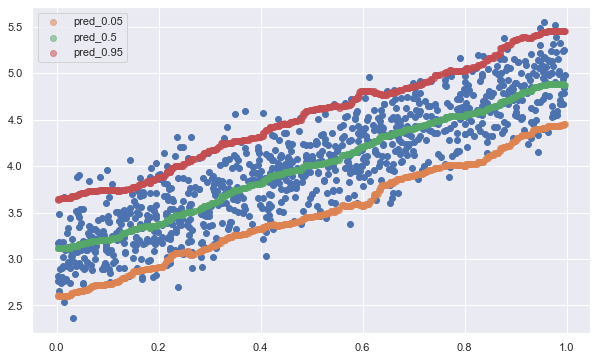

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_test, y_test)

for col in ['pred_0.05', 'pred_0.5', 'pred_0.95']:
    ax.scatter(x_test.reshape(-1,1), preds[col], alpha=0.50, label=col)

ax.legend()

# Coverage
<hr style="border:2px solid black"> </hr>

    
- When working with predicted quantiles, one **metric** we’re often interested in analyzing is coverage.
- **Coverage** is the percentage of targets that fall between two desired quantiles. As an example, coverage can be computed using the 5th and 95th quantiles as follows:
- Using the 5th and 95th quantiles, **assuming perfect calibration**, we would expect to have a coverage of 95–5 = 90%. In this example, the predicted quantiles were slightly off but still close, giving a coverage value of 91.4%.
    


In [8]:
coverage_90 = np.mean((y_test <= preds['pred_0.95']) & (
    y_test >= preds['pred_0.05']))*100
print(coverage_90)

90.60000000000001


# Non-Linear Regression with Variable Noise
<hr style="border:2px solid black"> </hr>

In [9]:
# Create regions of the domain that have variable noise
bounds = [(-10, -8), (-5, -4), (-4, -3), (-3, -1),
          (-1, 1), (1, 3), (3, 4), (4, 5), (8, 10)]
scales = [18, 15, 8, 11, 1, 2, 9, 16, 19]

x_train = np.array([])
x_test = np.array([])
y_train = np.array([])
y_test = np.array([])

for b, scale in zip(bounds, scales):

    # Randomly select the number of samples in each region
    n = np.random.randint(low=100, high=200)

    # Generate values of the domain between b[0] and b[1]
    x_curr = np.linspace(b[0], b[1], n)

    # For even scales, noise comes from an exponential distribution
    if scale % 2 == 0:

        noise_train = np.random.exponential(scale=scale, size=n)
        noise_test = np.random.exponential(scale=scale, size=n)

    # For odd scales, noise comes from a normal distribution
    else:

        noise_train = np.random.normal(scale=scale, size=n)
        noise_test = np.random.normal(scale=scale, size=n)

    # Create training and testing sets
    y_curr_train = x_curr**2 + noise_train
    y_curr_test = x_curr**2 + noise_test

    x_train = np.concatenate([x_train, x_curr])
    x_test = np.concatenate([x_test, x_curr])
    y_train = np.concatenate([y_train, y_curr_train])
    y_test = np.concatenate([y_test, y_curr_test])

In [10]:
model = CatBoostRegressor(iterations=300,
                          loss_function=f'MultiQuantile:alpha={quantile_str}')

model.fit(x_train.reshape(-1, 1), y_train)

preds = model.predict(x_test.reshape(-1, 1))
preds = pd.DataFrame(preds, columns=[f'pred_{q}' for q in quantiles])

0:	learn: 9.7461651	total: 27.1ms	remaining: 8.09s
1:	learn: 9.5212693	total: 52.1ms	remaining: 7.76s
2:	learn: 9.2864576	total: 72.1ms	remaining: 7.14s
3:	learn: 9.0819095	total: 92ms	remaining: 6.81s
4:	learn: 8.8724206	total: 112ms	remaining: 6.6s
5:	learn: 8.6823566	total: 132ms	remaining: 6.49s
6:	learn: 8.4880888	total: 153ms	remaining: 6.41s
7:	learn: 8.2987344	total: 172ms	remaining: 6.29s
8:	learn: 8.1090079	total: 193ms	remaining: 6.23s
9:	learn: 7.9460975	total: 214ms	remaining: 6.19s
10:	learn: 7.7821916	total: 235ms	remaining: 6.17s
11:	learn: 7.6050384	total: 255ms	remaining: 6.12s
12:	learn: 7.4510352	total: 276ms	remaining: 6.08s
13:	learn: 7.2929821	total: 297ms	remaining: 6.06s
14:	learn: 7.1381846	total: 317ms	remaining: 6.02s
15:	learn: 6.9988927	total: 336ms	remaining: 5.97s
16:	learn: 6.8672241	total: 356ms	remaining: 5.93s
17:	learn: 6.7302579	total: 376ms	remaining: 5.89s
18:	learn: 6.6071895	total: 396ms	remaining: 5.86s
19:	learn: 6.4863306	total: 417ms	remain

167:	learn: 3.3503561	total: 3.3s	remaining: 2.59s
168:	learn: 3.3495454	total: 3.32s	remaining: 2.57s
169:	learn: 3.3492340	total: 3.34s	remaining: 2.55s
170:	learn: 3.3485545	total: 3.36s	remaining: 2.53s
171:	learn: 3.3480256	total: 3.38s	remaining: 2.51s
172:	learn: 3.3477808	total: 3.4s	remaining: 2.49s
173:	learn: 3.3471958	total: 3.42s	remaining: 2.47s
174:	learn: 3.3463111	total: 3.43s	remaining: 2.45s
175:	learn: 3.3457320	total: 3.45s	remaining: 2.43s
176:	learn: 3.3450543	total: 3.48s	remaining: 2.42s
177:	learn: 3.3446703	total: 3.5s	remaining: 2.4s
178:	learn: 3.3439347	total: 3.52s	remaining: 2.38s
179:	learn: 3.3435854	total: 3.54s	remaining: 2.36s
180:	learn: 3.3432080	total: 3.56s	remaining: 2.34s
181:	learn: 3.3428008	total: 3.58s	remaining: 2.32s
182:	learn: 3.3411642	total: 3.6s	remaining: 2.3s
183:	learn: 3.3408399	total: 3.62s	remaining: 2.28s
184:	learn: 3.3404122	total: 3.63s	remaining: 2.26s
185:	learn: 3.3381560	total: 3.65s	remaining: 2.24s
186:	learn: 3.3367

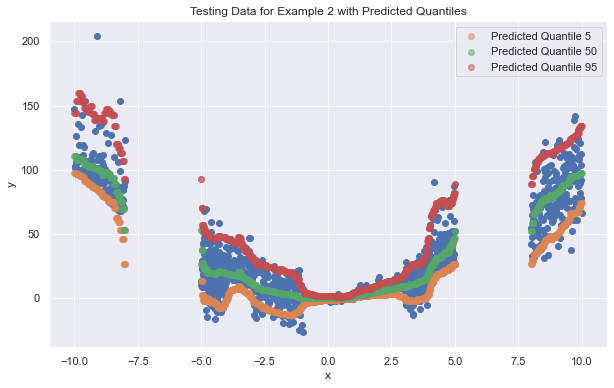

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_test, y_test)

for col in ['pred_0.05', 'pred_0.5', 'pred_0.95']:

    quantile = int(float(col.split('_')[-1])*100)
    label_name = f'Predicted Quantile {quantile}'
    ax.scatter(x_test.reshape(-1, 1), preds[col], alpha=0.50, label=label_name)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Testing Data for Example 2 with Predicted Quantiles')
ax.legend()

    
- Upon visual inspection, the model has characterized this non-linear, heteroscedastic relationship well. Notice how, near x = 0, the three predicted quantiles converge towards a single value.
- This is because the region near x = 0 has almost no noise — any model that correctly predicts the conditional probability distribution in this region should predict a small variance. Conversely, when x is between 7.5 and 10.0, the predicted quantiles are much further apart because of the inherent noise in the region. 90% coverage can be computed as before:
    


In [12]:
coverage_90 = np.mean((y_test <= preds['pred_0.95']) & (
    y_test >= preds['pred_0.05']))*100
print(coverage_90)

88.60759493670885


# Folder clean-up
<hr style="border:2px solid black"> </hr>

In [13]:
!rm -rf catboost_info

# Conclusions
<hr style="border:2px solid black"> </hr>

    
- It’s important to note that quantile regression makes no statistical or algorithmic guarantees of convergence, and the performance of these models will vary depending on the nature of the learning problem. 



# References
<hr style="border:2px solid black"> </hr>


- https://towardsdatascience.com/a-new-way-to-predict-probability-distributions-e7258349f464
- https://catboost.ai/en/docs/concepts/loss-functions-regression#MultiQuantile
- https://brendanhasz.github.io/2018/12/15/quantile-regression.html
    


# Requirements
<hr style="border:2px solid black"> </hr>

In [14]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

matplotlib: 3.5.1
catboost  : 1.1.1
seaborn   : 0.11.2
json      : 2.0.9
pandas    : 1.5.3
autopep8  : 1.6.0
numpy     : 1.21.6

